In [1]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os

# 设置图像的输入尺寸和类别数
input_shape = (128, 128, 3)  # 输入图像的尺寸
num_classes = 3  # 类别数


train_dirs = ['/root/images/ED1', '/root/images/ED2_GaussianNoisy',
             '/root/images/ED3_NotBalancedGan', '/root/images/ED4_BalancedGan',
             '/root/images/ED5_ColorJittering', '/root/images/ED6_MirrorHorizontally',
             '/root/images/ED7_GaussianBlur', '/root/images/ED8_MixUp']  

2023-06-07 17:56:06.125998: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
# 绘制混淆矩阵
def plot_confusion_matrix(model, test_generator, dataset_name):
    # 评估模型在测试集上的准确率
    test_loss, test_acc = model.evaluate(test_generator, verbose=2)
    print("Test Accuracy: {:.2f}%".format(test_acc * 100))

    # 预测测试集的类别
    y_true = test_generator.classes
    y_pred = model.predict(test_generator)
    y_pred = np.argmax(y_pred, axis=1)

    # 计算混淆矩阵
    cm = confusion_matrix(y_true, y_pred)

    # 绘制混淆矩阵图像
    class_names = list(test_generator.class_indices.keys())
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    # plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()

    # 在每个格子中添加对应的数字
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    save_dir = 'Result_img'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # 保存混淆矩阵图像
    plt.savefig(os.path.join(save_dir, dataset_name + 'confusion_matrix.png'), dpi=600)


In [3]:
# 加载预训练的 GoogleNet 模型，不包括顶部的全连接层
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=input_shape)

# 冻结预训练模型的权重
base_model.trainable = False

# 添加自定义的顶部全连接层
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# 编译模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

2023-06-07 17:56:08.011317: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-06-07 17:56:08.092838: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:ce:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 871.81GiB/s
2023-06-07 17:56:08.092885: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-06-07 17:56:08.097224: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-06-07 17:56:08.097356: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-06-07 17:56:08.098621: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcu

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 22,328,099
Trainable params: 525,315
Non-trainable params: 21,802,784
_________________________________________________________________
None


Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/50


2023-06-07 17:56:12.215080: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-06-07 17:56:12.243454: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2600000000 Hz
2023-06-07 17:56:16.024437: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-06-07 17:56:16.820505: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8101
2023-06-07 17:56:17.732482: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-06-07 17:56:18.385221: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


 5/75 [=>............................] - ETA: 2s - loss: 2.9463 - accuracy: 0.4437

2023-06-07 17:56:18.732759: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


75/75 [==============================] - 11s 56ms/step - loss: 0.9982 - accuracy: 0.6717 - val_loss: 0.5455 - val_accuracy: 0.7900
Epoch 2/50
75/75 [==============================] - 3s 35ms/step - loss: 0.4948 - accuracy: 0.8129 - val_loss: 0.4449 - val_accuracy: 0.8383
Epoch 3/50
75/75 [==============================] - 3s 36ms/step - loss: 0.4002 - accuracy: 0.8604 - val_loss: 0.4006 - val_accuracy: 0.8583
Epoch 4/50
75/75 [==============================] - 3s 36ms/step - loss: 0.3190 - accuracy: 0.8863 - val_loss: 0.3488 - val_accuracy: 0.8783
Epoch 5/50
75/75 [==============================] - 3s 37ms/step - loss: 0.2531 - accuracy: 0.9117 - val_loss: 0.3055 - val_accuracy: 0.9133
Epoch 6/50
75/75 [==============================] - 3s 37ms/step - loss: 0.2264 - accuracy: 0.9217 - val_loss: 0.2986 - val_accuracy: 0.9050
Epoch 7/50
75/75 [==============================] - 3s 37ms/step - loss: 0.2068 - accuracy: 0.9283 - val_loss: 0.3185 - val_accuracy: 0.9117
Epoch 8/50
75/75 [=====

KeyboardInterrupt: 

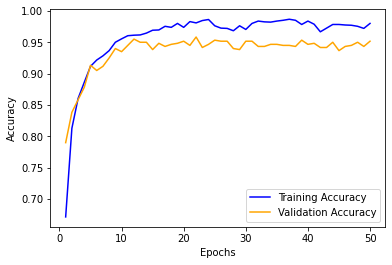

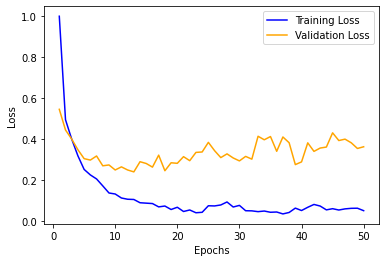

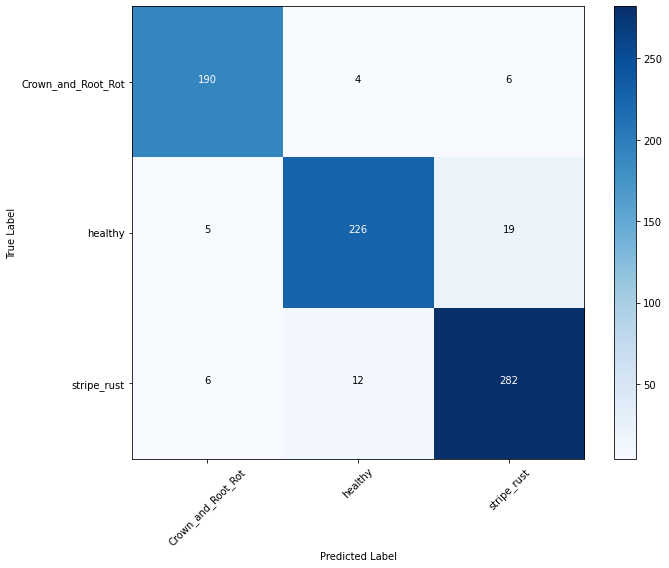

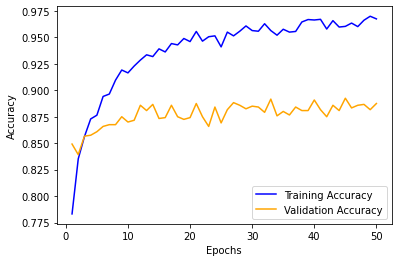

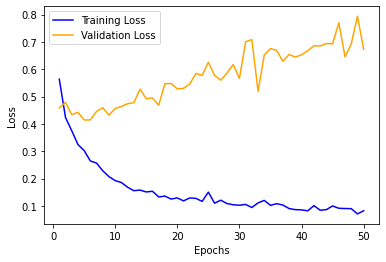

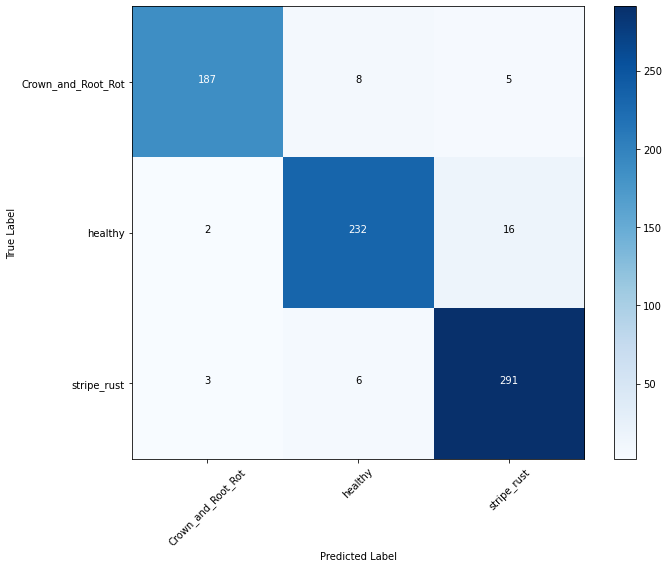

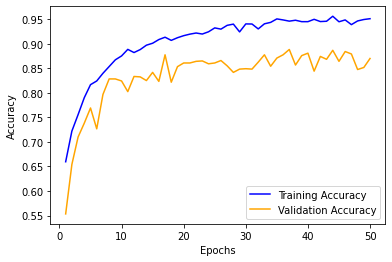

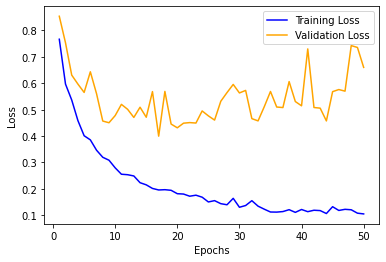

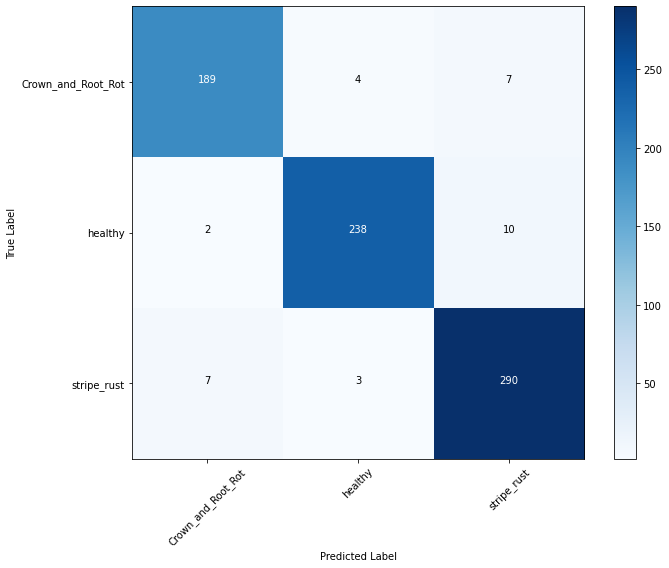

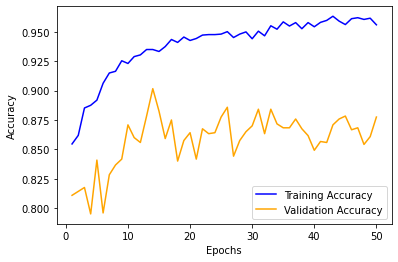

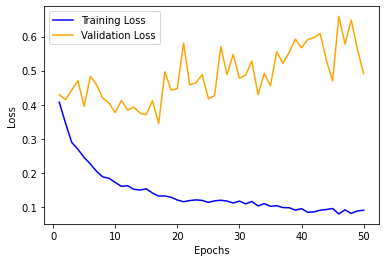

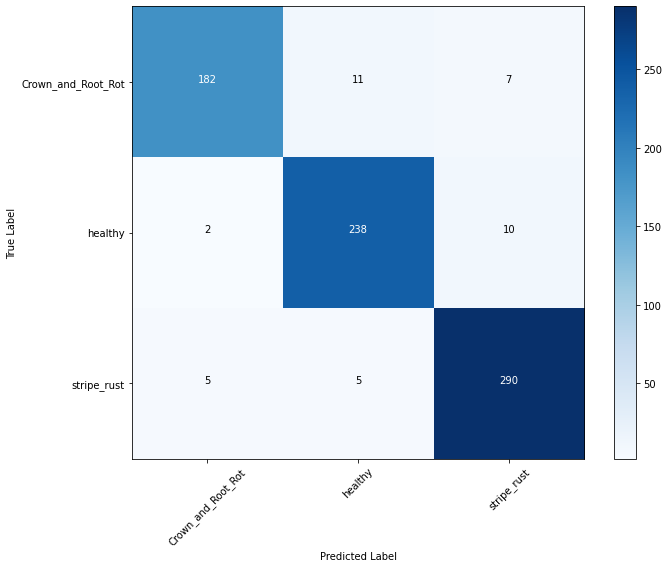

In [4]:
for i, train_dir_NP in enumerate(train_dirs):
    
    # 当前数据集名字
    dataset_name = train_dir_NP.split('/')[-1]
    
    # 定义数据生成器
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    
    train_dir = train_dir_NP
    val_dir = train_dir_NP
    test_dir = '/root/images/test'

    # 加载训练集和验证集
    train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        subset='training'
    )

    validation_generator = datagen.flow_from_directory(
        val_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
    )

    # 加载测试集
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    # 训练模型并绘制准确率图像
    history = model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator
    )
    
    
        
    # 保存模型参数
    save_dir = '/root/Result_img'
    model_dir = os.path.join(save_dir, dataset_name)
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    model.save_weights(os.path.join(model_dir, 'model_weights.h5'))

    
    # 创建保存图像的文件夹
    save_dir = 'Result_img'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
        
    # 提取训练集和验证集的准确率
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    # 提取训练集和验证集的损失
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # 绘制准确率图像
    plt.figure()
    epochs = range(1, len(train_acc) + 1)
    plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'orange', label='Validation Accuracy')
    # plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(os.path.join(save_dir, dataset_name+'accuracy_plot.png'), dpi=1200)

    
    # 绘制损失图像
    plt.figure()
    plt.plot(epochs, train_loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
    # plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(os.path.join(save_dir, dataset_name+'loss_plot.png'), dpi=1200)
    
    # 绘制混淆矩阵
    plot_confusion_matrix(model, test_generator, dataset_name)
    
    print("--------",dataset_name, "-------- Over")
    